In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the datasets
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

In [3]:

# Inspect datasets
def inspect_data(df, name):
    print(f"--- {name} Dataset ---")
    print(df.head())
    print(df.info())
    print(df.describe(include='all'))
    print("\n")

inspect_data(customers, "Customers")

--- Customers Dataset ---
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawre

In [4]:
inspect_data(products, "Products")

--- Products Dataset ---
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
       ProductID            ProductName Category       Price
count        100                    100      100  100.000000
unique       100                     66        4         NaN
top         P001  ActiveWear Sma

In [5]:
inspect_data(transactions, "Transactions")

--- Transactions Dataset ---
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity      

In [6]:
# Clean the data
# Check for missing values
print("Missing values:")
print("Customers:\n", customers.isnull().sum())
print("Products:\n", products.isnull().sum())
print("Transactions:\n", transactions.isnull().sum())

Missing values:
Customers:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
Products:
 ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
Transactions:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [7]:

# Convert date columns to datetime format
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [8]:
# Merge datasets for analysis
merged_data = pd.merge(transactions, customers, on="CustomerID", how="inner")
merged_data = pd.merge(merged_data, products, on="ProductID", how="inner")

In [9]:

# Basic statistics
print("\n--- Basic Statistics ---")
print("Total Customers:", customers['CustomerID'].nunique())
print("Total Products:", products['ProductID'].nunique())
print("Total Transactions:", transactions['TransactionID'].nunique())
print("Total Revenue:", transactions['TotalValue'].sum())


--- Basic Statistics ---
Total Customers: 200
Total Products: 100
Total Transactions: 1000
Total Revenue: 689995.56


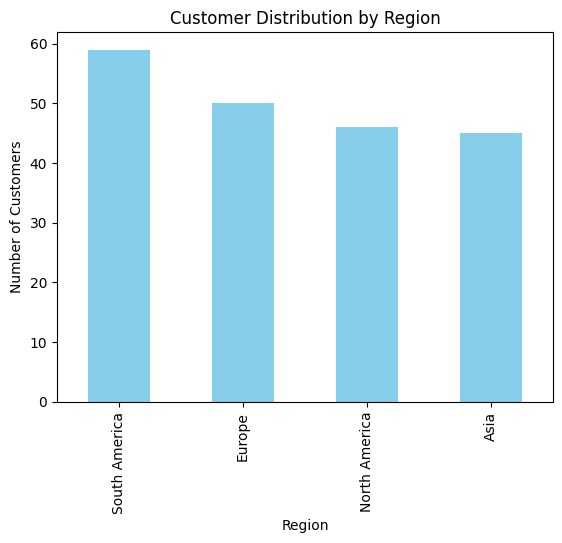

In [10]:
# Visualizations
# 1. Distribution of customers by region
region_counts = customers['Region'].value_counts()
region_counts.plot(kind='bar', title='Customer Distribution by Region', color='skyblue')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.show()

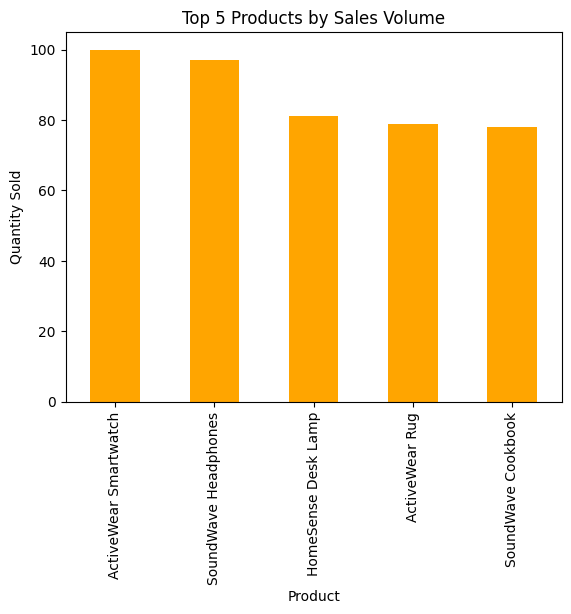

In [11]:
# 2. Top 5 products by sales volume
top_products = merged_data.groupby('ProductName')['Quantity'].sum().nlargest(5)
top_products.plot(kind='bar', title='Top 5 Products by Sales Volume', color='orange')
plt.xlabel('Product')
plt.ylabel('Quantity Sold')
plt.show()

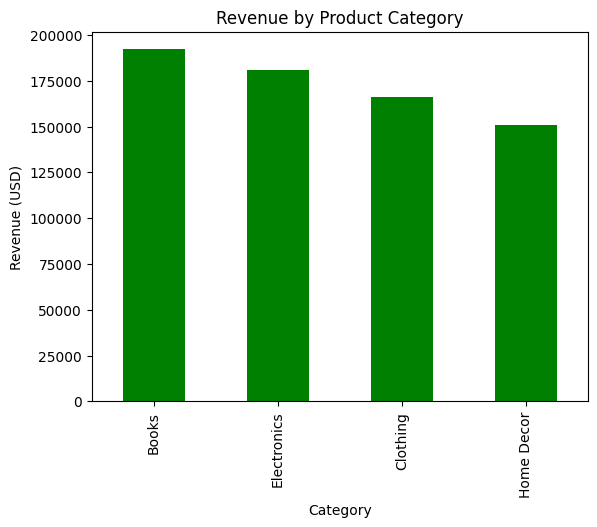

In [12]:
# 3. Revenue by product category
category_revenue = merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
category_revenue.plot(kind='bar', title='Revenue by Product Category', color='green')
plt.xlabel('Category')
plt.ylabel('Revenue (USD)')
plt.show()

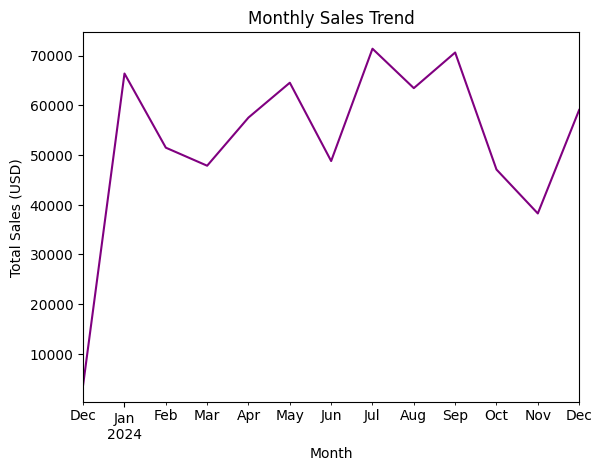

In [13]:
# 4. Monthly sales trend
merged_data['Month'] = merged_data['TransactionDate'].dt.to_period('M')
monthly_sales = merged_data.groupby('Month')['TotalValue'].sum()
monthly_sales.plot(title='Monthly Sales Trend', color='purple')
plt.xlabel('Month')
plt.ylabel('Total Sales (USD)')
plt.show()

In [14]:

# 5. Average spend per customer
avg_spend = merged_data.groupby('CustomerID')['TotalValue'].sum().mean()
print(f"Average spend per customer: ${avg_spend:.2f}")

Average spend per customer: $3467.31


In [16]:
print("EDA Completed. Insights derived and visualizations saved.")

EDA Completed. Insights derived and visualizations saved.
